# Droup out
---

- 드랍 아웃은 몇개의 노드들을 학습 과정에서 랜덤하게 제외하여 역전파가 전체적으로 잘 이루어지도록하여 기울기 소실문제를 해결할 수 있다.
<img width="451" alt="image" src="https://user-images.githubusercontent.com/88031549/200205485-4271cafc-ae09-453a-892b-4f946c86ab67.png">


실습 예제 : MNIST 손글씨 인식(0~9)

---
# 1. Data 확인

In [5]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test).shape[0])

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


## 데이터 plot

5


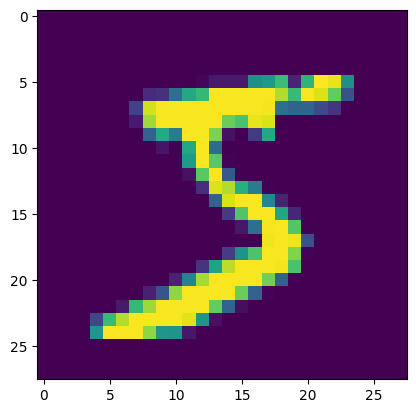

In [9]:
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(X_train[0])
plt.show()


- 데이터가 7만개이다 -> row가 7만개  
- 데이터 하나가 28x28의 이미지로 이루어져 있으면 이를 1차원배열로 만들면 784개가 되고 여기서 784개의 컬럼으로 학습시킴을 알 수 있다.
- 따라서 784개의 속성을 이용해 10개의 클래스를 맞히는 문제

## 픽셀로 데이터 확인
- 가로 28 x 세로 28 = 총 784개의 픽셀
- 각 픽셀은 밝기 정도에 따라 0~255의 등급을 가짐(흰색=0)

In [10]:
import sys
for i in X_train[0]:
    for j in i:
        sys.stdout.write("%d\t" % j)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


---
# 2. Deeplearning 학습
- x_train, x_test에 255를 나눠 각 데이터는 0~1사이의 값을 가짐(각 셀은 밝기에 따라 0~255를 갖음)
- 이전과 다르게 입력이 1차원으로 변경한 이미지 데이터라, 입력층이 model.add(~Flatten)이다.(히든레이어랑 같이 사용x)
  - flatten을 안하려면, 데이터 자체를 X_train = X_train.reshape(X_train.shape[0],784) 로 하여 input_dim=784로 넣는다.
- 분류 문제이기에 출력층 활성화함수는 softmax
- 다중 분류이면 onehotencoding을 해야하지만 loss로 "sparse" categorical crossentropy를 하게되면 엔코딩 필요x
- Dropout을 중간에 0.2로 선택

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 입력층
model.add(tf.keras.layers.Dense(512, activation='relu')) # 히든층
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # 출력층

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

2022-11-07 10:07:31.254181: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2205 - accuracy: 0.9356
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0967 - accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0689 - accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0548 - accuracy: 0.9820
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0700 - accuracy: 0.9787


[0.07002779841423035, 0.9786999821662903]

10번쨰 데이터 예측

In [38]:
import numpy as np
model.predict(np.array(X_test[9]))

# model.predict(X_test)[9] # 전체 예측해서 9번째 예측 데이터 출력

1/1 [==============================] - 0s 152ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

---
# 3. 이미지 인식_CDN

In [35]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print(X_train.shape[0], X_test.shape[0])

60000 10000


## 1) 데이터 check

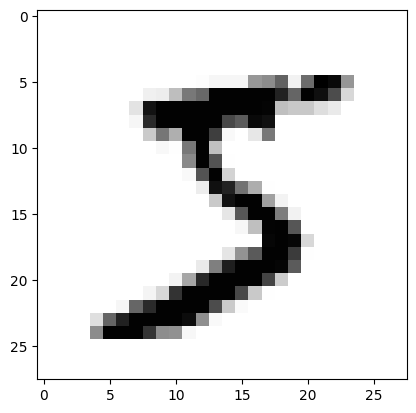

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="Greys")
plt.show()

### 픽셀 확인

In [31]:
import sys
for i in X_train[0]:
    for j in i:
        sys.stdout.write("%d\t" % j)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


## 2) Data 차원변경 및 정규화

In [34]:
X_train.shape

(60000, 28, 28)

In [ ]:
# 2차원(28x28)을 1차원으로 바꿔주어 784개의 속성으로 사용
X_train = X_train.reshape(X_train.shape[0], 784)

# 케라스는 데이터가 0~1 값일 때 최적의 성능으로 예측
X_train = X_train.astype("float64")
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0],784).astype("float64") / 255


## 3) 바이너리화

In [36]:
# train0의 class는 5이다.
print("class : %d " % (Y_class_train[0]))

# 이를 벡터화하면(바이너리화)
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 4) modeling

In [ ]:
import tensorflow as tf

# 모델 프레임 설정
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, input_dim=784, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# 모델 실행 환경 설정
model.compile(loss="categorical_corssentropy",
                optimizer="adam",
                metrics=["accuracy"])

# 모델 저장, 모델 최적하 단계에서 학습 자동 중단 설정


---
# 3. CNN

- convolution(합성곱) : 주변 화소값들에 가중치를 곱해서 더한 후에 이것을 새로운 화소값으로 하는 연산이다.
- kernal(mask) : conv 중 [[1,0,-1],[-1,0,1],[0,1,0]]과 같은 필터. 이미지 데이터와 합성곱을 한다.
- stride : kernal 적용하는 단위(2면 2칸씩 이동하며 kernal적용하여 합성곱!)
- padding
- max pooling : (= 서브샘플링 방법) 해당 행렬 중 큰 값을 추출하여 입력의 차원을 줄인다.(큰 값 = 색깔 진한 특징 높은 값)
- 

Convolution(합성곱)  
<img width="563" alt="image" src="https://user-images.githubusercontent.com/88031549/200231053-13717646-5eba-4b1c-b2ae-8d14318f6dfc.png">

kernal(mask)  
<img width="398" alt="image" src="https://user-images.githubusercontent.com/88031549/200230842-ac199c65-e82d-4703-aef1-d1529ddf5d4e.png">


Max Pooling(subsampling)  
<img width="457" alt="image" src="https://user-images.githubusercontent.com/88031549/200230937-c7878d5a-46cf-4640-b778-48be13225207.png">